<a href="https://colab.research.google.com/github/rishiguptha54/FIFA/blob/main/FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()


Saving WorldCupMatches.csv to WorldCupMatches.csv
Saving WorldCupPlayers.csv to WorldCupPlayers.csv
Saving WorldCups.csv to WorldCups.csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
df1 = pd.read_csv('WorldCupMatches.csv')
df2 = pd.read_csv('WorldCupPlayers.csv')
df3 = pd.read_csv('WorldCups.csv')


## **Data Showing**

### **Data of WorldCupMatches**

In [10]:
df1

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Data of WorldCup Players**

In [11]:
df2

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


### Data of World Over the years

In [12]:
df3

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


## **Top 5 winning teams**

In [13]:
top5_teams = df3['Winner'].value_counts().head(5)
print(top5_teams)


Winner
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
Name: count, dtype: int64


## **Most Consistent Teams**

In [14]:
winner_counts = df3['Winner'].value_counts()
runnerup_counts = df3['Runners-Up'].value_counts()
third_counts = df3['Third'].value_counts()
all_counts = winner_counts.add(runnerup_counts, fill_value=0).add(third_counts, fill_value=0)
most_consistent = all_counts.sort_values(ascending=False)
print(most_consistent.head(5))


Brazil        9.0
Germany FR    7.0
Italy         7.0
Argentina     5.0
Germany       5.0
Name: count, dtype: float64


## **Home Teams for Each Stadium**

In [15]:
home_teams = df1.groupby('Stadium')['Home Team Name'].unique()
print(home_teams)


Stadium
Arena Amazonia                     [England, Cameroon, USA, Honduras]
Arena Fonte Nova    [Spain, Germany, Switzerland, rn">Bosnia and H...
Arena Pantanal                        [Chile, Russia, Nigeria, Japan]
Arena Pernambuco     [C�te d'Ivoire, Italy, Croatia, USA, Costa Rica]
Arena da Baixada              [IR Iran, Honduras, Australia, Algeria]
                                          ...                        
Wankdorf Stadium              [Uruguay, Germany FR, England, Hungary]
Wembley Stadium                  [England, France, Uruguay, Portugal]
Westfalenstadion                       [Zaire, Netherlands, Bulgaria]
White City                                                  [Uruguay]
Zentralstadion      [rn">Serbia and Montenegro, Spain, France, Ira...
Name: Home Team Name, Length: 181, dtype: object


## **Total Goals Per Each Year**

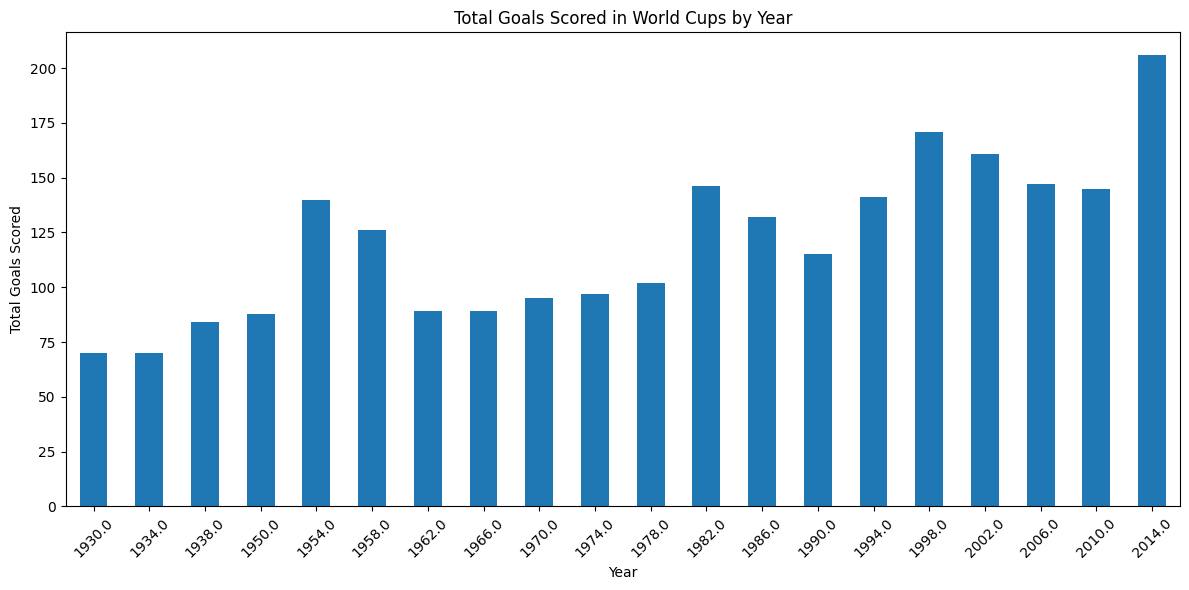

In [16]:

goals_by_year = df1.groupby('Year')['Home Team Goals'].sum() + df1.groupby('Year')['Away Team Goals'].sum()
plt.figure(figsize=(12, 6))
goals_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Goals Scored')
plt.title('Total Goals Scored in World Cups by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Matches Played**

In [17]:
team_matches = df1['Home Team Name'].value_counts() + df1['Away Team Name'].value_counts()
print(team_matches.sort_values(ascending=False))


Brazil               108.0
Italy                 83.0
Argentina             81.0
Germany FR            62.0
England               62.0
                     ...  
Dutch East Indies      NaN
Egypt                  NaN
El Salvador            NaN
Israel                 NaN
Kuwait                 NaN
Name: count, Length: 83, dtype: float64


## **Underperformed Teams**

In [18]:
df1['Goal Difference'] = df1['Home Team Goals'] - df1['Away Team Goals']
team_goal_difference = df1.groupby('Home Team Name')['Goal Difference'].sum() + df1.groupby('Away Team Name')['Goal Difference'].sum()
team_matches_threshold = 10
significant_teams = team_matches[team_matches >= team_matches_threshold]
underperforming_teams = team_goal_difference[team_goal_difference.index.isin(significant_teams.index) & (team_goal_difference < 0)]
most_underperforming = underperforming_teams.sort_values()

print(most_underperforming)


Croatia   -10.0
Japan      -6.0
Algeria    -3.0
Denmark    -3.0
Name: Goal Difference, dtype: float64


## **Yearwise attendance Visualization**

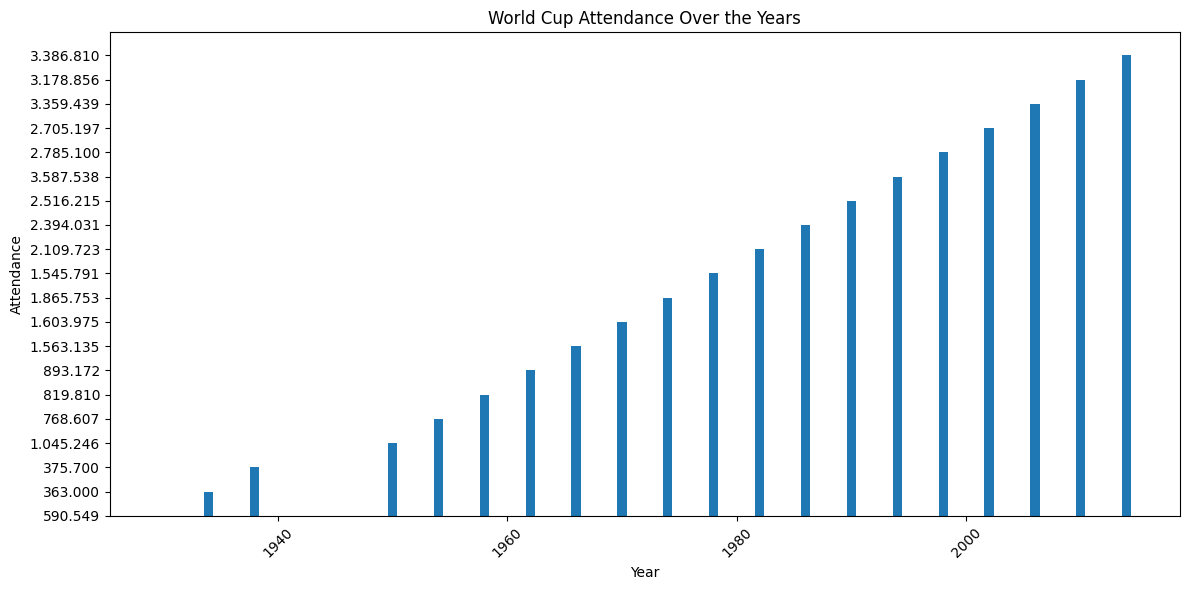

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(df3['Year'], df3['Attendance'])
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.title('World Cup Attendance Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Yearwise Goals Contribution of top 5 teams**

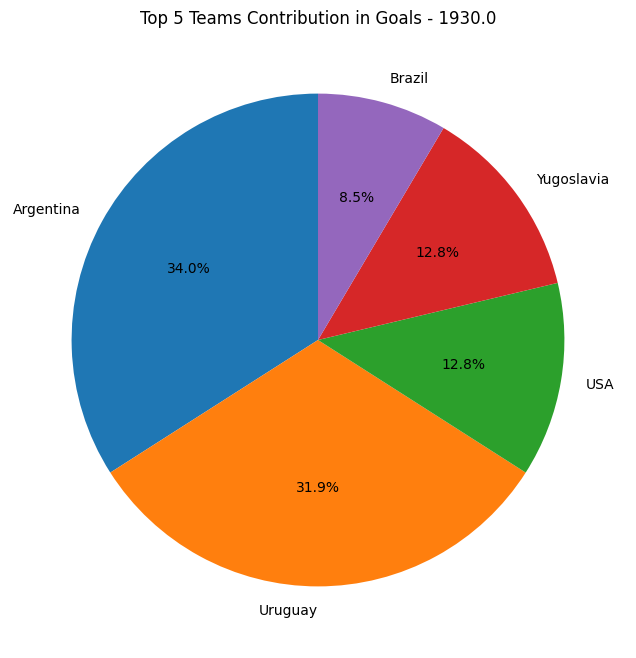

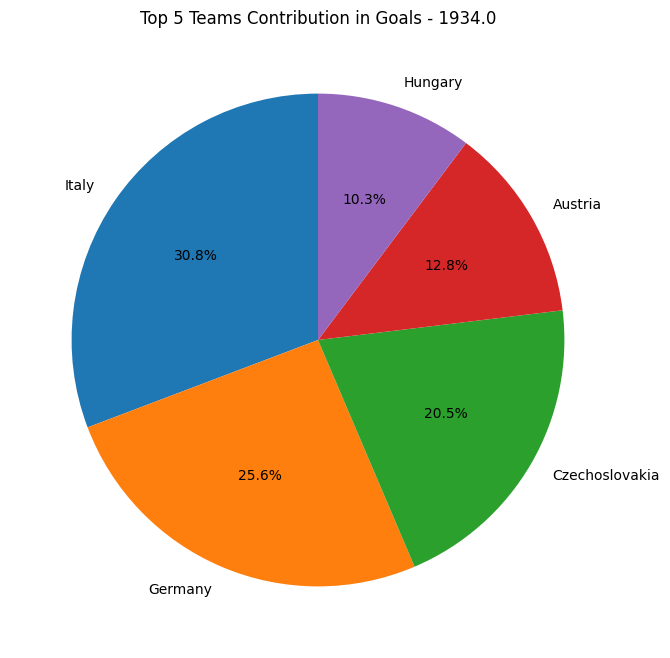

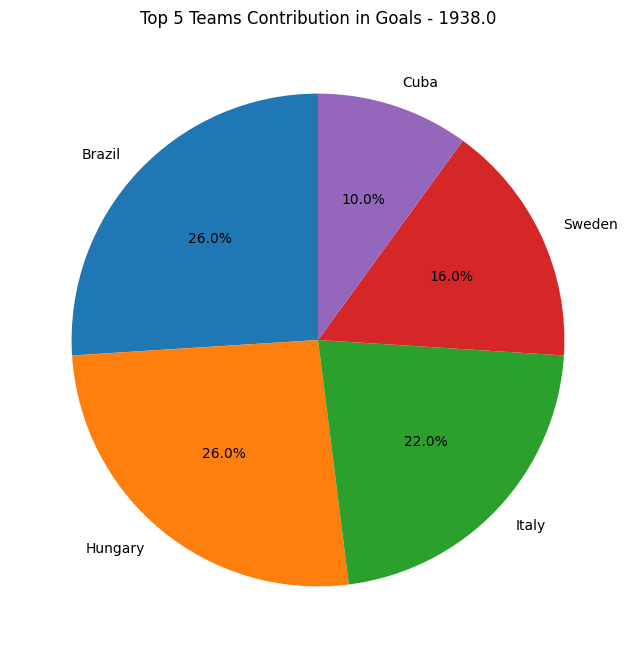

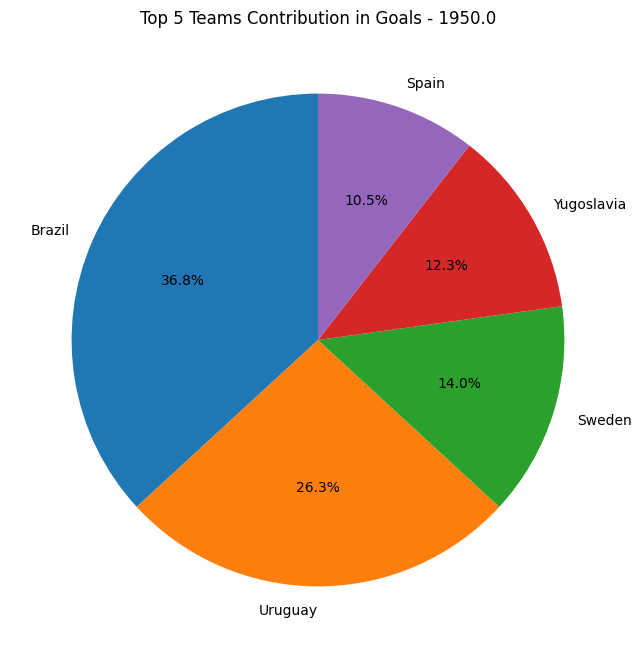

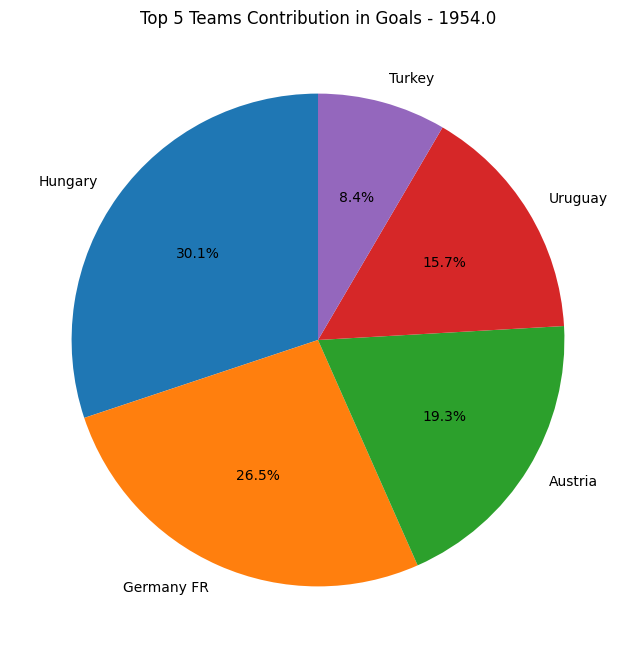

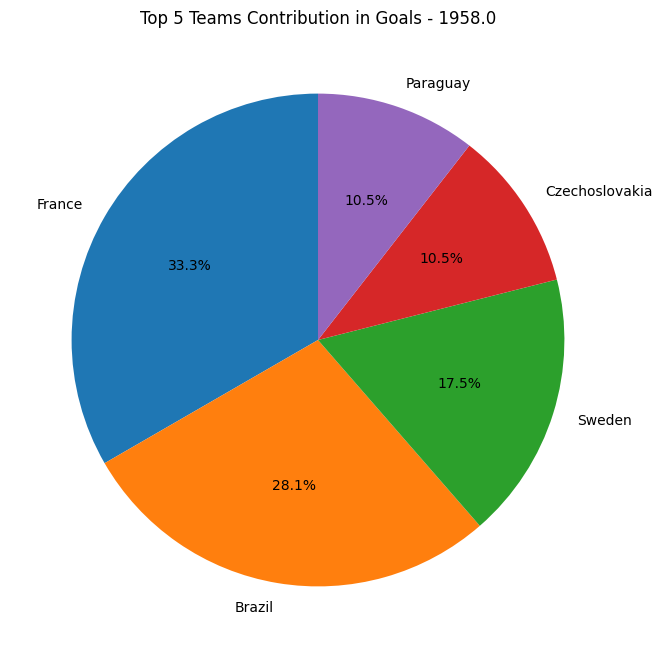

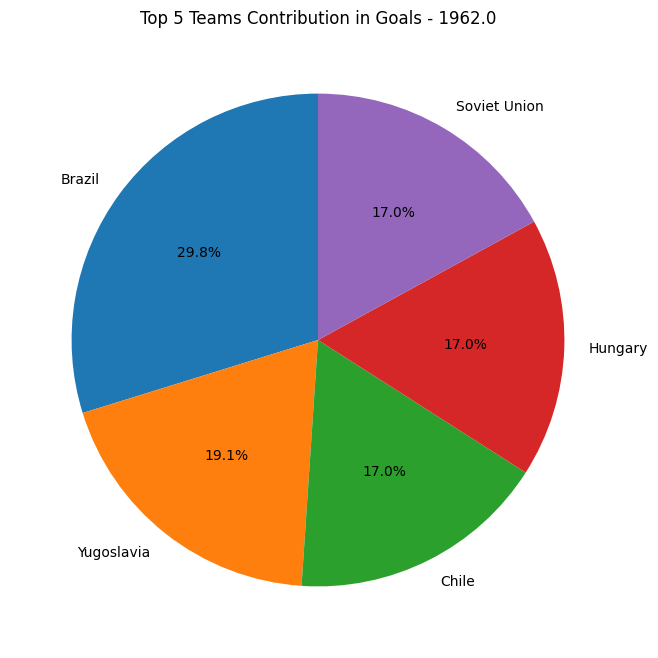

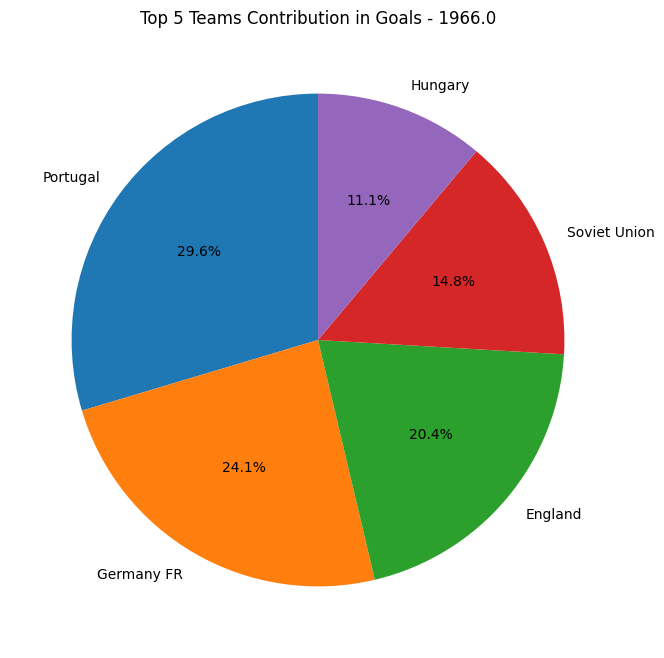

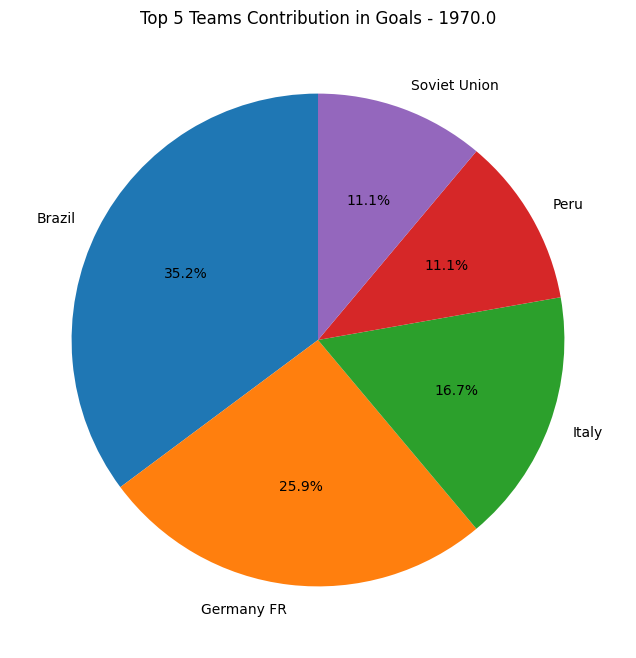

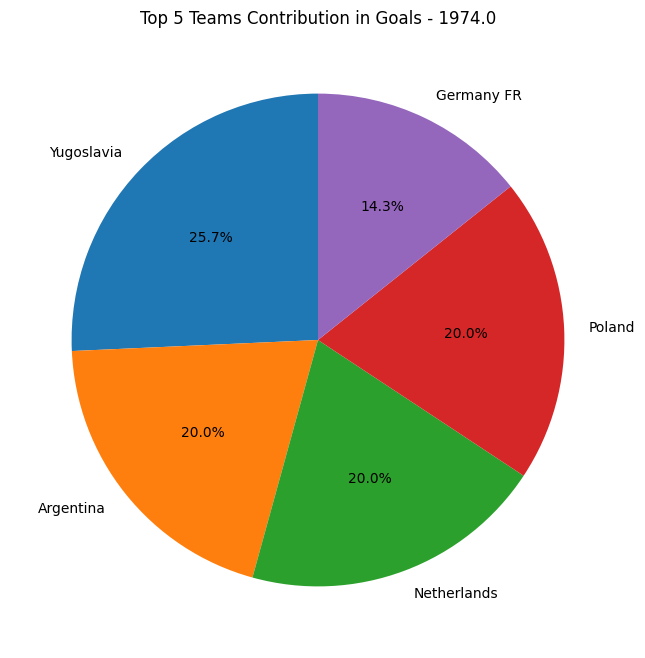

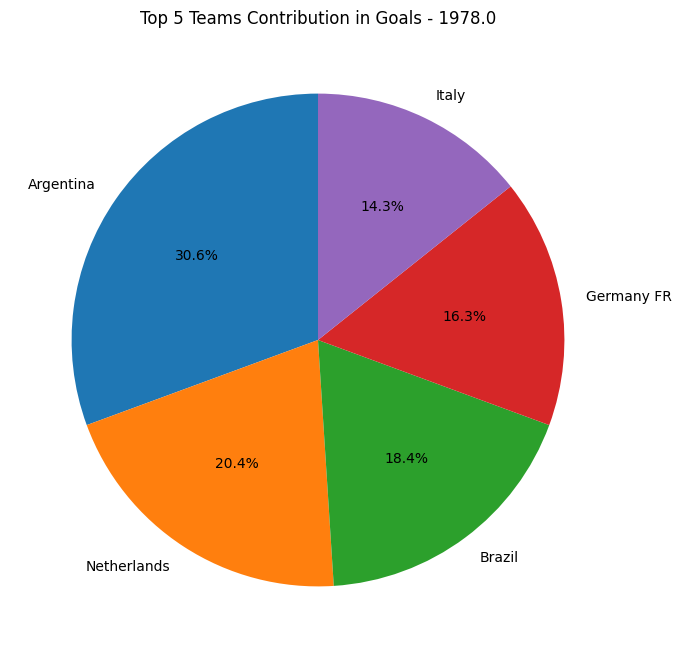

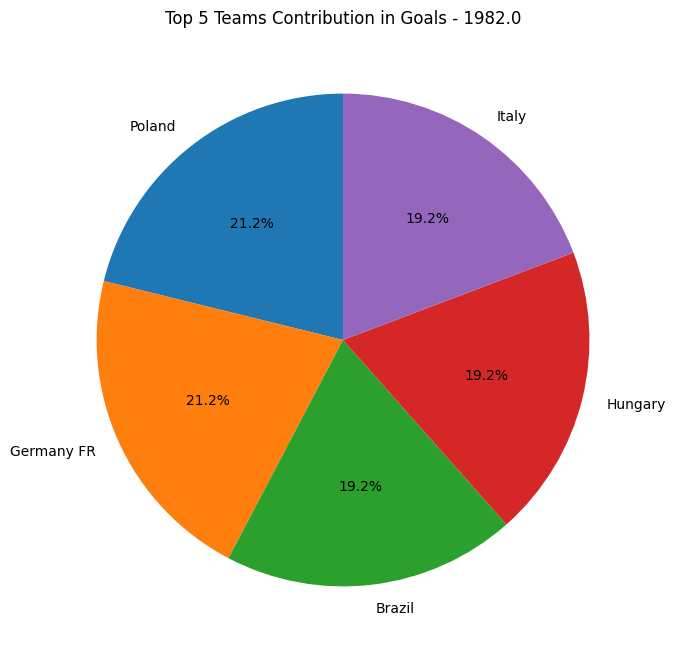

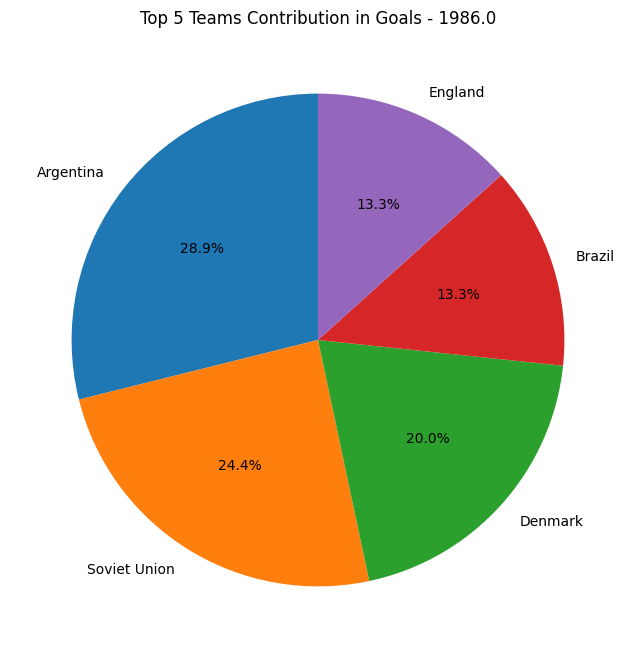

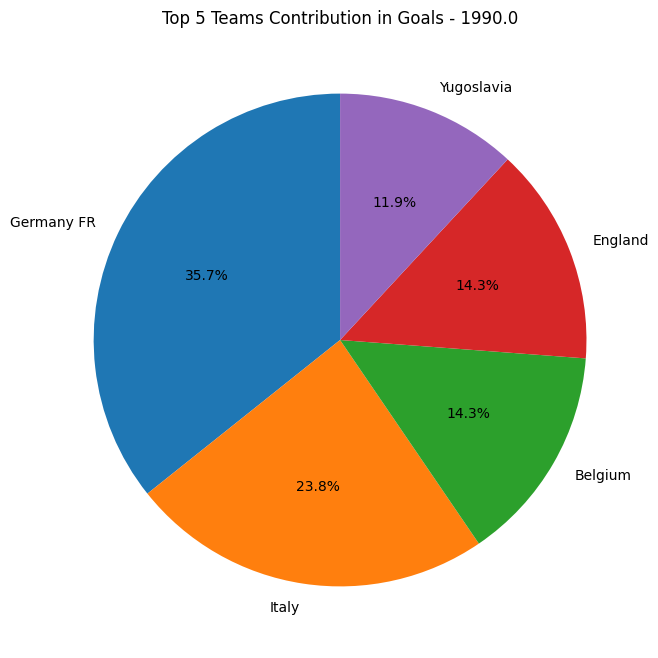

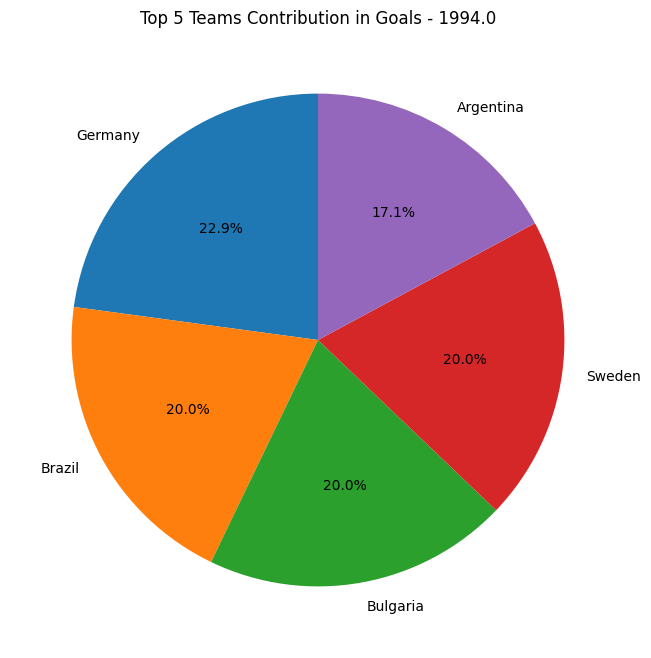

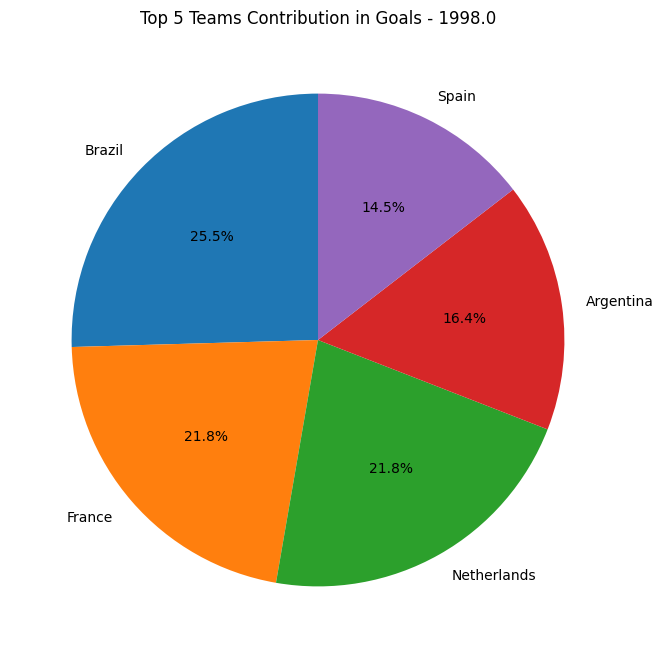

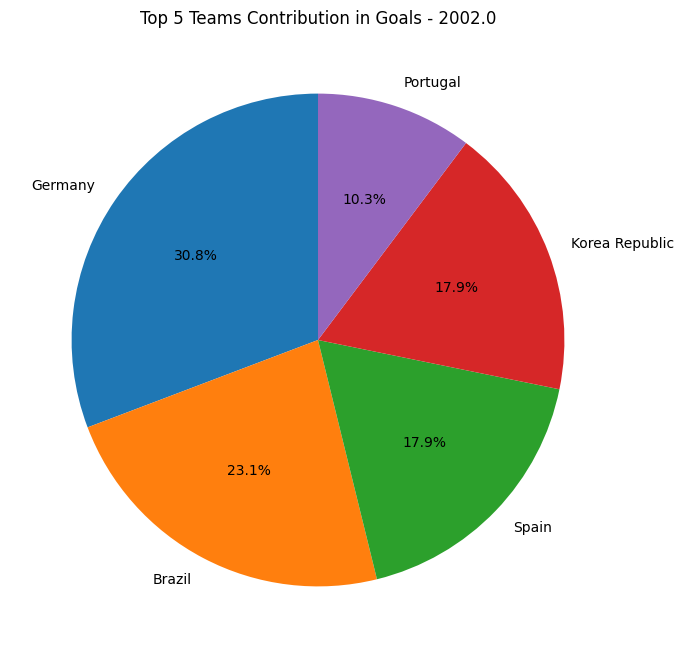

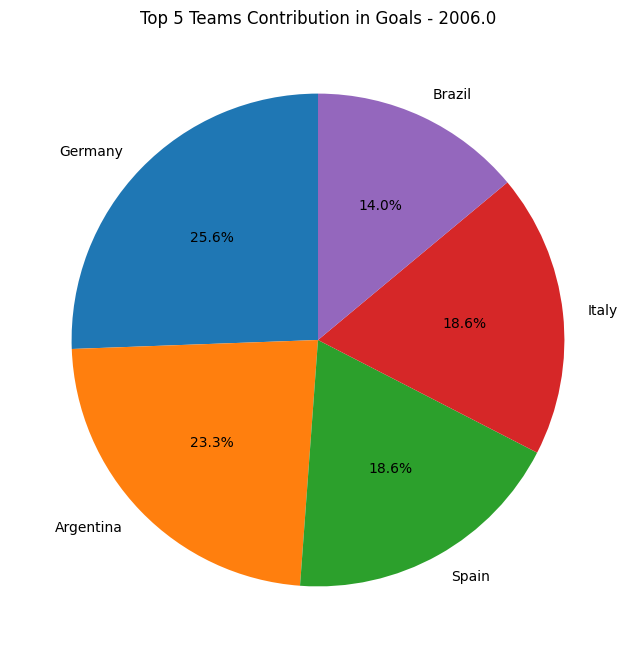

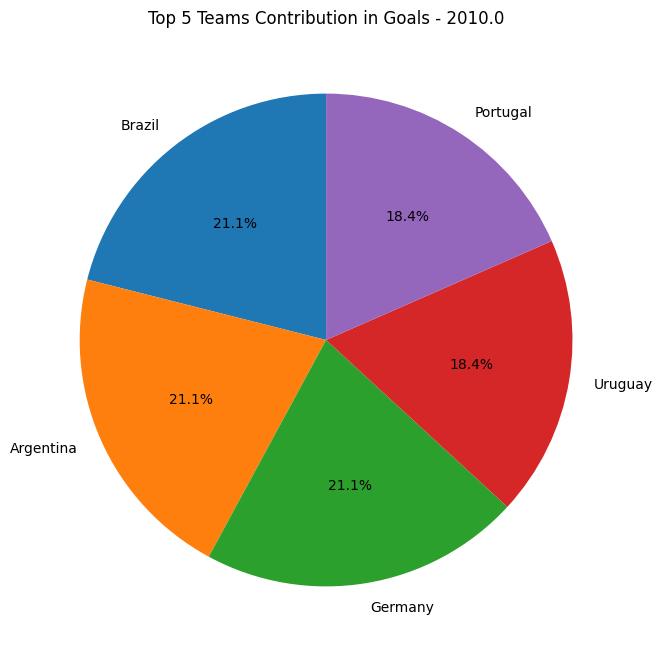

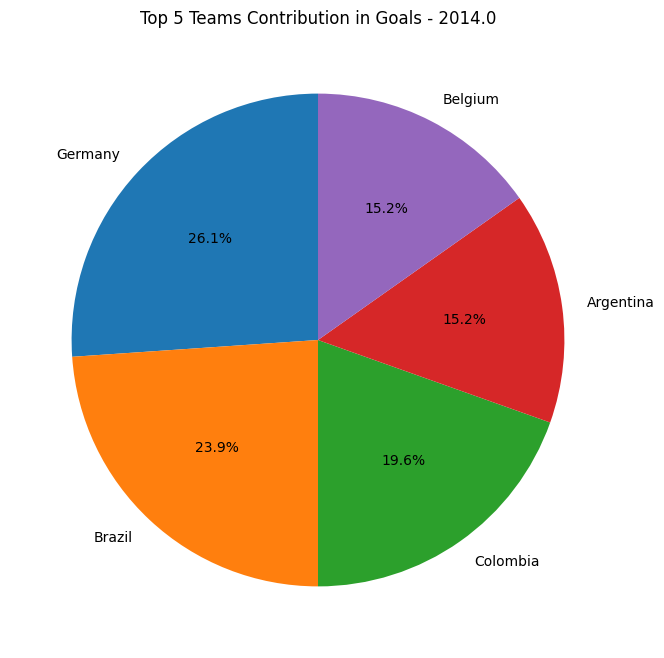

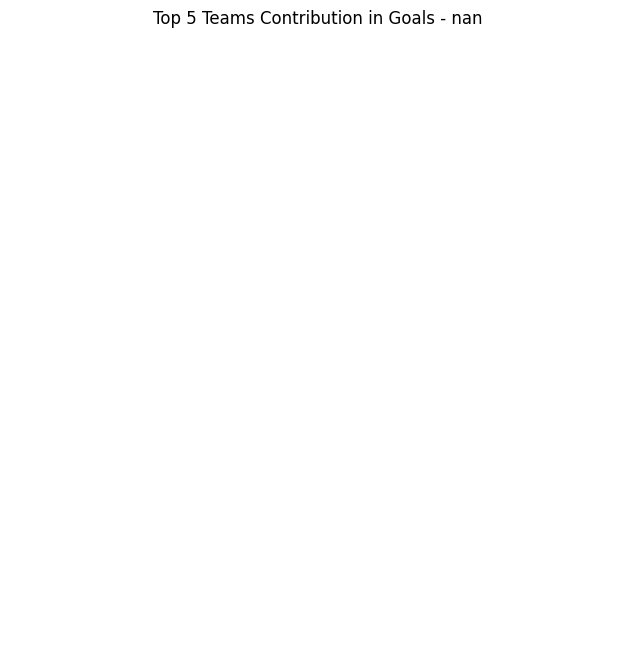

In [21]:
goals_by_team_year = df1.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum().reset_index()
goals_by_team_year = goals_by_team_year.rename(columns={'Home Team Name': 'Team', 'Home Team Goals': 'Goals'})

for year in df1['Year'].unique():
    year_data = goals_by_team_year[goals_by_team_year['Year'] == year]
    top5_teams = year_data.sort_values(by='Goals', ascending=False).head(5)

    plt.figure(figsize=(8, 8))
    plt.pie(top5_teams['Goals'], labels=top5_teams['Team'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Top 5 Teams Contribution in Goals - {year}')
    plt.show()


## **Total Matches Played in Each Year**

In [22]:
!pip install plotly
import plotly.graph_objects as go

matches_by_year = df1['Year'].value_counts().sort_index()

fig = go.Figure(go.Funnel(
    y = matches_by_year.index.astype(str).tolist(),
    x = matches_by_year.values.tolist(),
    textposition = "inside",
    textinfo = "value+percent initial"
))

fig.update_layout(title='Total Matches Played in Each Year')
fig.show()
